In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

# Data Cleaning

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.drop_duplicates(inplace = True)

In [5]:
data.info()

data.dropna(how = 'any', inplace=True)

data = data[~data['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data_new = data.copy()

In [7]:
data_new.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2209 non-null   int64  
 1   Year_Birth           2209 non-null   int64  
 2   Education            2209 non-null   object 
 3   Marital_Status       2209 non-null   object 
 4   Income               2209 non-null   float64
 5   Kidhome              2209 non-null   int64  
 6   Teenhome             2209 non-null   int64  
 7   Dt_Customer          2209 non-null   object 
 8   Recency              2209 non-null   int64  
 9   MntWines             2209 non-null   int64  
 10  MntFruits            2209 non-null   int64  
 11  MntMeatProducts      2209 non-null   int64  
 12  MntFishProducts      2209 non-null   int64  
 13  MntSweetProducts     2209 non-null   int64  
 14  MntGoldProds         2209 non-null   int64  
 15  NumDealsPurchases    2209 non-null   int64 

In [9]:
data_new['Dt_Customer'] = pd.to_datetime(data_new['Dt_Customer'], format = "%d-%m-%Y")

In [10]:
# data_new['Dependants'] = data_new['Kidhome'] + data_new['Teenhome']

In [11]:
data_new['Age'] = 2014 - data_new['Year_Birth']

In [12]:
data_campain = data_new[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response']]

In [13]:
num_purchases = data_new[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [14]:
data_monetary = data_new[['MntWines', 
             'MntFruits',
             'MntMeatProducts', 
             'MntFishProducts', 
             'MntSweetProducts', 
             'MntGoldProds']]

In [15]:
data['Complain'].value_counts()

Complain
0    2188
1      21
Name: count, dtype: int64

In [16]:
data_new.drop(columns= ['ID', 'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                        'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response', 'NumDealsPurchases', 
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                        'Complain', 'Dt_Customer', 'Recency'], inplace=True)

In [17]:
data_new = data_new[(data_new["Age"]<90)]
data_new = data_new[(data_new["Income"]<600000)]

data_new.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,57
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,60
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,49
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,30
4,PhD,Married,58293.0,1,0,173,43,118,46,27,15,33


In [18]:
data_new_filter = data_new[~data_new['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

print(data_new)

       Education Marital_Status   Income  Kidhome  Teenhome  MntWines  \
0     Graduation         Single  58138.0        0         0       635   
1     Graduation         Single  46344.0        1         1        11   
2     Graduation       Together  71613.0        0         0       426   
3     Graduation       Together  26646.0        1         0        11   
4            PhD        Married  58293.0        1         0       173   
...          ...            ...      ...      ...       ...       ...   
2235  Graduation        Married  61223.0        0         1       709   
2236         PhD       Together  64014.0        2         1       406   
2237  Graduation       Divorced  56981.0        0         0       908   
2238      Master       Together  69245.0        0         1       428   
2239         PhD        Married  52869.0        1         1        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172   

In [19]:
data_encoded = pd.get_dummies(data_new, columns= ['Education', 'Marital_Status'])

In [20]:
data_encoded

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,635,88,546,172,88,88,57,False,False,True,False,False,False,False,True,False,False
1,46344.0,1,1,11,1,6,2,1,6,60,False,False,True,False,False,False,False,True,False,False
2,71613.0,0,0,426,49,127,111,21,42,49,False,False,True,False,False,False,False,False,True,False
3,26646.0,1,0,11,4,20,10,3,5,30,False,False,True,False,False,False,False,False,True,False
4,58293.0,1,0,173,43,118,46,27,15,33,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,709,43,182,42,118,247,47,False,False,True,False,False,False,True,False,False,False
2236,64014.0,2,1,406,0,30,0,0,8,68,False,False,False,False,True,False,False,False,True,False
2237,56981.0,0,0,908,48,217,32,12,24,33,False,False,True,False,False,True,False,False,False,False
2238,69245.0,0,1,428,30,214,80,30,61,58,False,False,False,True,False,False,False,False,True,False


# Data Analysis

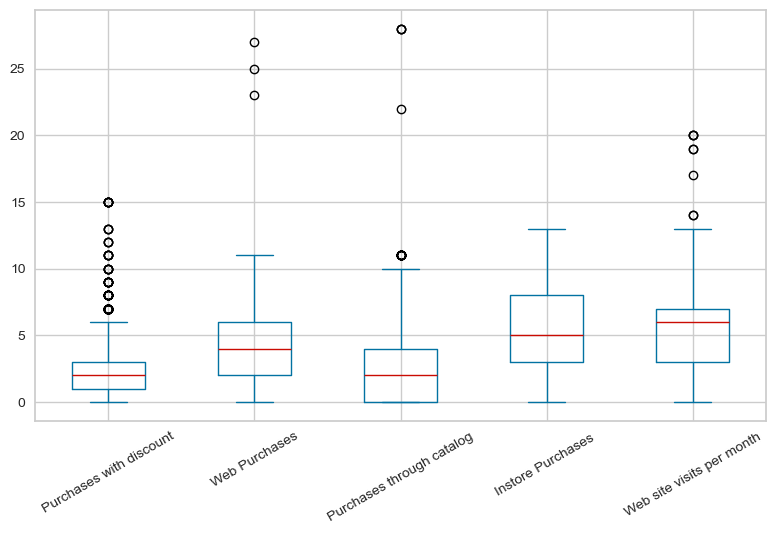

In [21]:
new_labels_num = {'NumDealsPurchases': 'Purchases with discount', 
              'NumWebPurchases': 'Web Purchases',
              'NumCatalogPurchases': 'Purchases through catalog',
              'NumStorePurchases': 'Instore Purchases ',
              'NumWebVisitsMonth': 'Web site visits per month'
          }

num_purchases.rename(columns=new_labels_num, inplace=True)           
ax = num_purchases.plot(kind='box')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

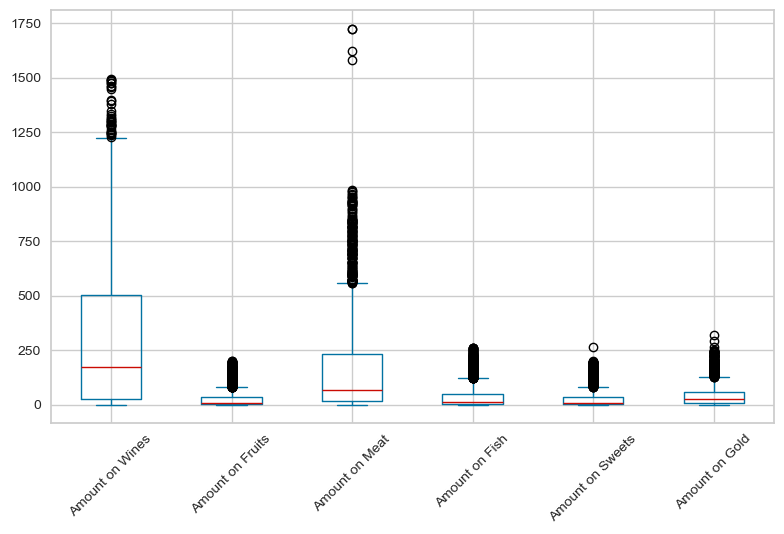

In [22]:
new_labels_mnt = {'MntWines': 'Amount on Wines', 
              'MntFruits': 'Amount on Fruits', 
              'MntMeatProducts': 'Amount on Meat', 
              'MntFishProducts': 'Amount on Fish',
              'MntSweetProducts': 'Amount on Sweets',
              'MntGoldProds': 'Amount on Gold'
             }
data_monetary.rename(columns=new_labels_mnt, inplace=True)

ax = data_monetary.plot(kind='box')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

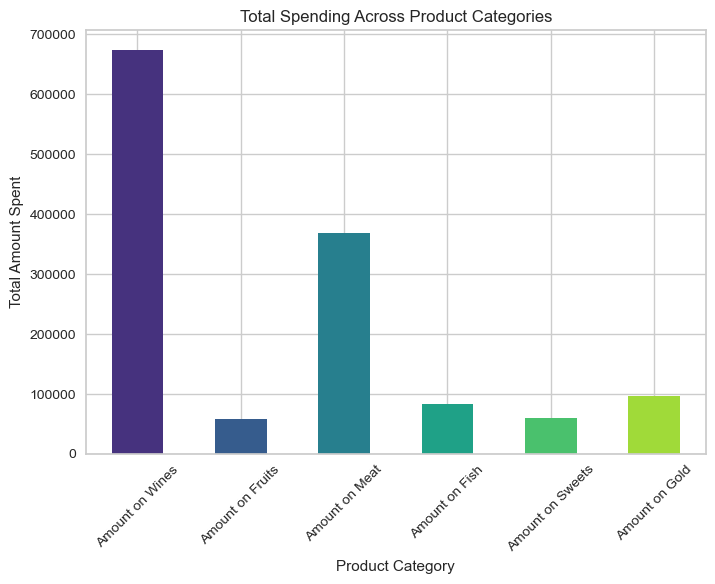

In [23]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = data_new[spending_columns].sum()

total_spending.index = total_spending.index.map(new_labels_mnt)

total_spending.plot(kind='bar', color=sns.color_palette('viridis'))
plt.title('Total Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

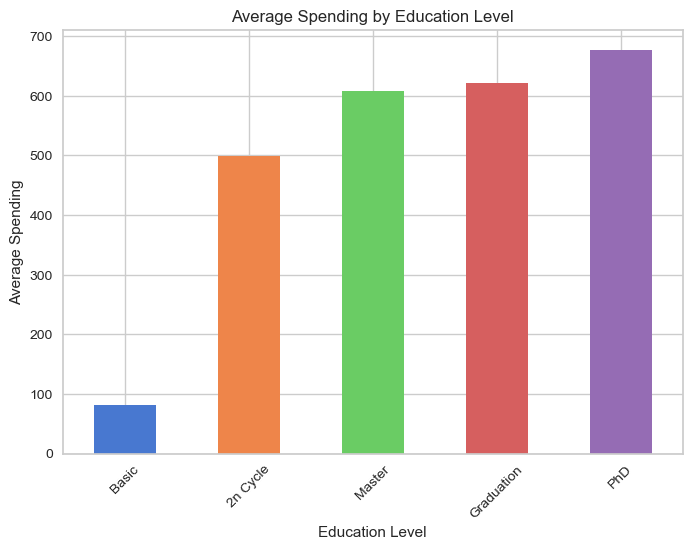

In [24]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

# Group by education and calculate total spending
education_spending = data_new.groupby('Education')['Total_Spending'].mean().sort_values()

# Plot the spending by education level
education_spending.plot(kind='bar', color=sns.color_palette('muted'))

plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_6644\2281090451.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='muted')


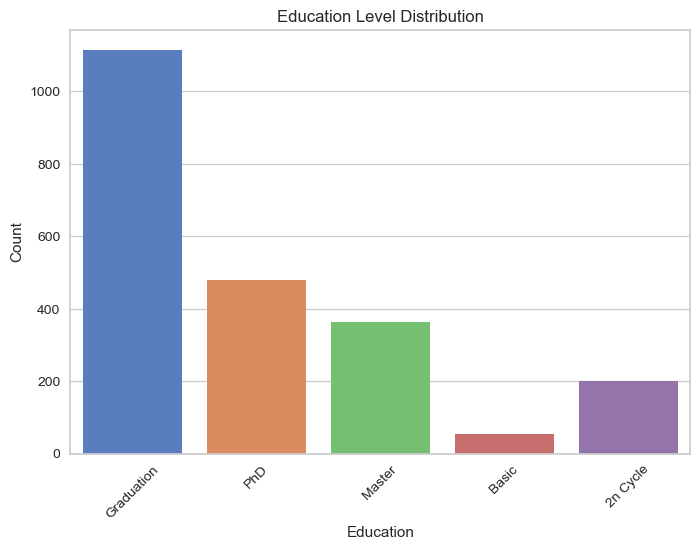

In [25]:
sns.countplot(x='Education', data=data, palette='muted')
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

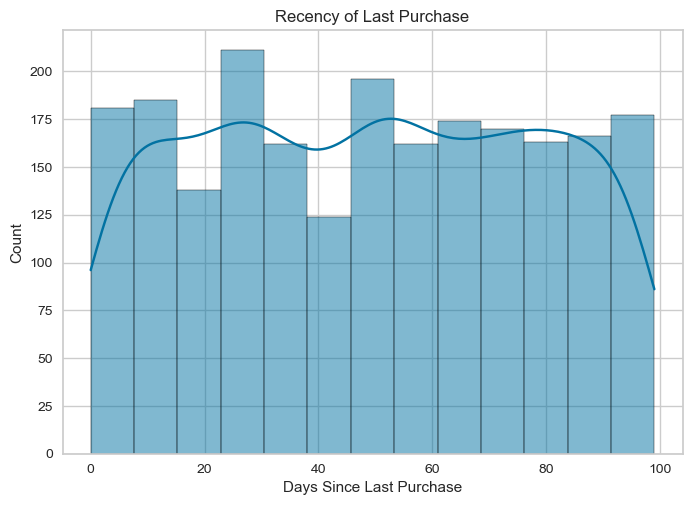

In [26]:
sns.histplot(data['Recency'], kde=True)
plt.title('Recency of Last Purchase')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Count')
plt.show()

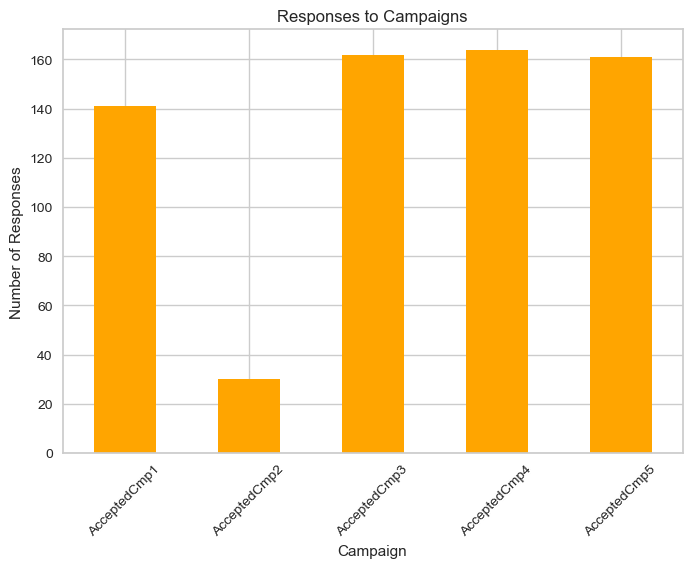

In [27]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = data[campaign_columns].sum()

campaign_responses.plot(kind='bar', color='orange')
plt.title('Responses to Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.show()

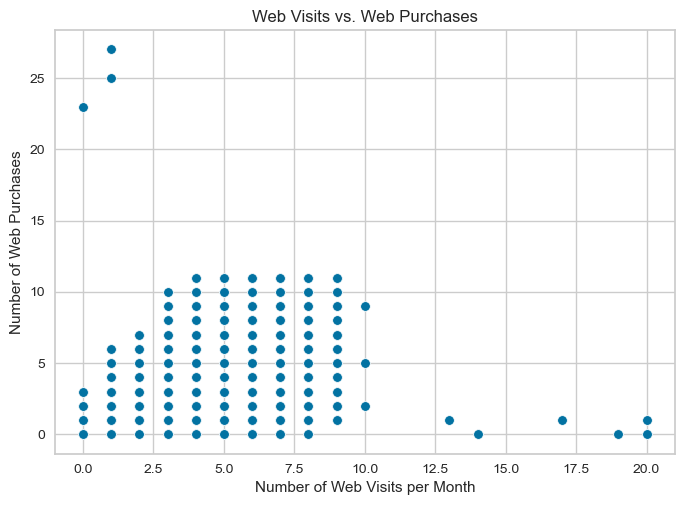

In [28]:
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=data)
plt.title('Web Visits vs. Web Purchases')
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Number of Web Purchases')
plt.show()

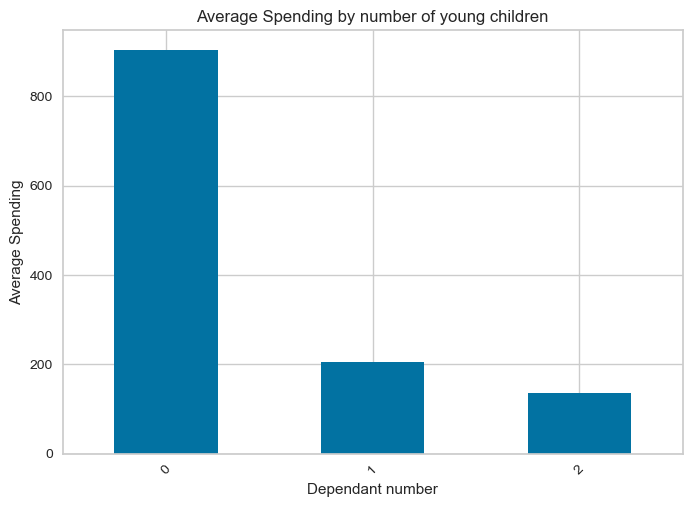

In [29]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Kidhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of young children')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

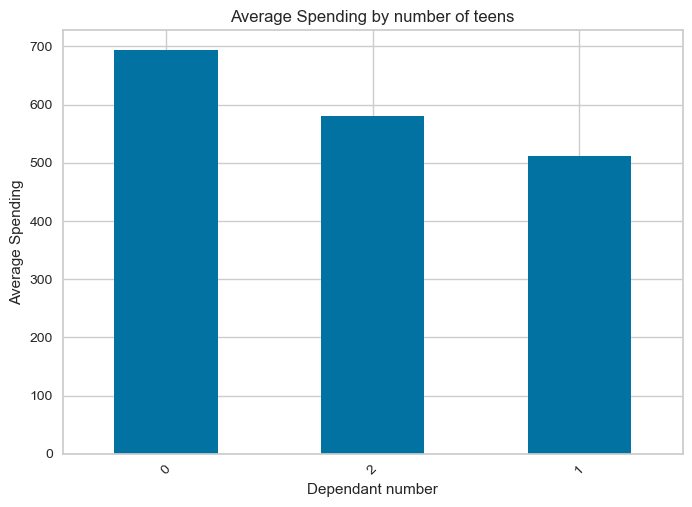

In [30]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

kids_spending = data_new.groupby('Teenhome')['Total_Spending'].mean().sort_values(ascending=False)

kids_spending.plot(kind='bar')

plt.title('Average Spending by number of teens')
plt.xlabel('Dependant number')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_6644\606001067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=data_new, palette='viridis')


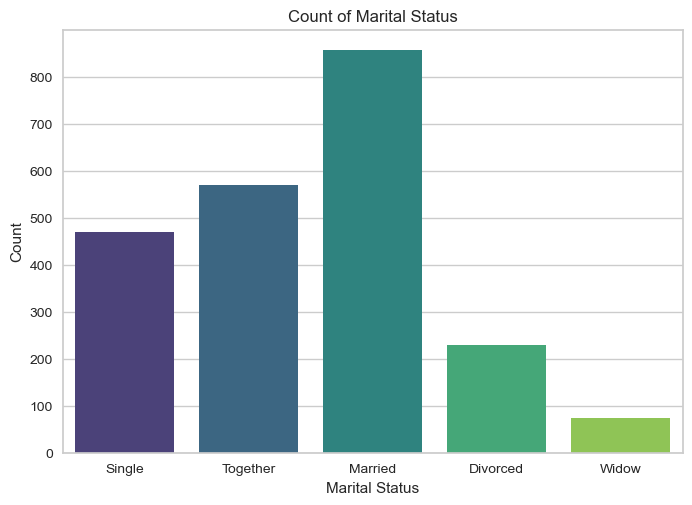

In [31]:
sns.countplot(x='Marital_Status', data=data_new, palette='viridis')
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

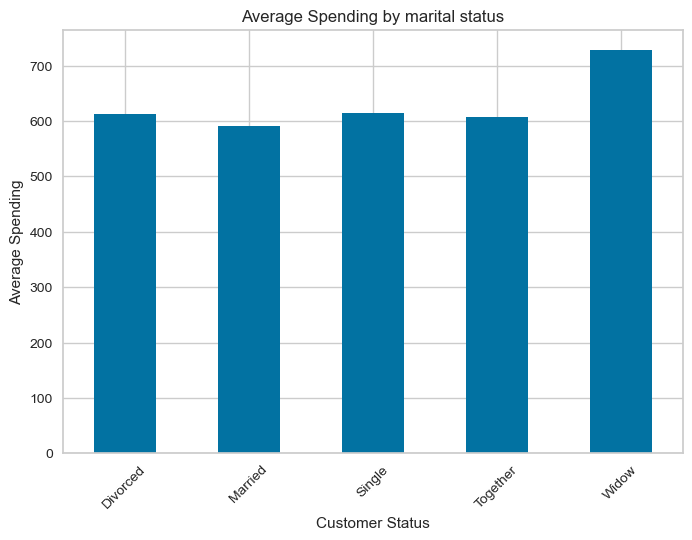

In [32]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_new['Total_Spending'] = data_new[spending_columns].sum(axis=1)

data_new_filtered = data_new[~data_new['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

kids_spending = data_new_filtered.groupby('Marital_Status')['Total_Spending'].mean()

kids_spending.plot(kind='bar')

plt.title('Average Spending by marital status')
plt.xlabel('Customer Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

## Scaler

In [33]:
ss = StandardScaler()

'''fit scaler on numeric features'''
ss.fit(data_encoded)

'''scale numeric features'''
data_new_scaled = ss.transform(data_encoded)

data_new_scaled

array([[ 0.28707126, -0.82263572, -0.92908279, ...,  1.9213249 ,
        -0.59114229, -0.18893785],
       [-0.26047975,  1.03969669,  0.90825134, ...,  1.9213249 ,
        -0.59114229, -0.18893785],
       [ 0.91266477, -0.82263572, -0.92908279, ..., -0.52047418,
         1.6916401 , -0.18893785],
       ...,
       [ 0.23335611, -0.82263572, -0.92908279, ..., -0.52047418,
        -0.59114229, -0.18893785],
       [ 0.80272745, -0.82263572,  0.90825134, ..., -0.52047418,
         1.6916401 , -0.18893785],
       [ 0.04245143,  1.03969669,  0.90825134, ..., -0.52047418,
        -0.59114229, -0.18893785]])

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


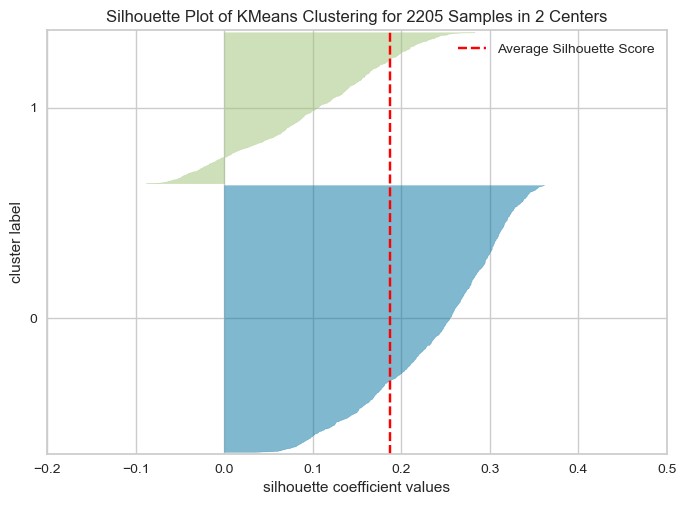

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


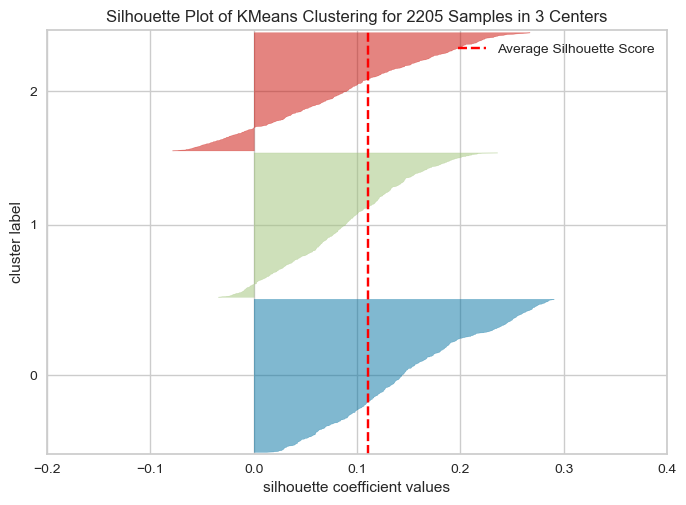

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


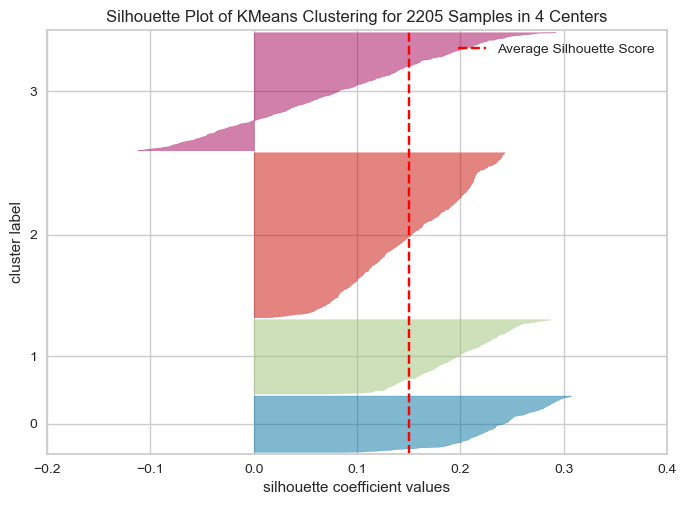

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


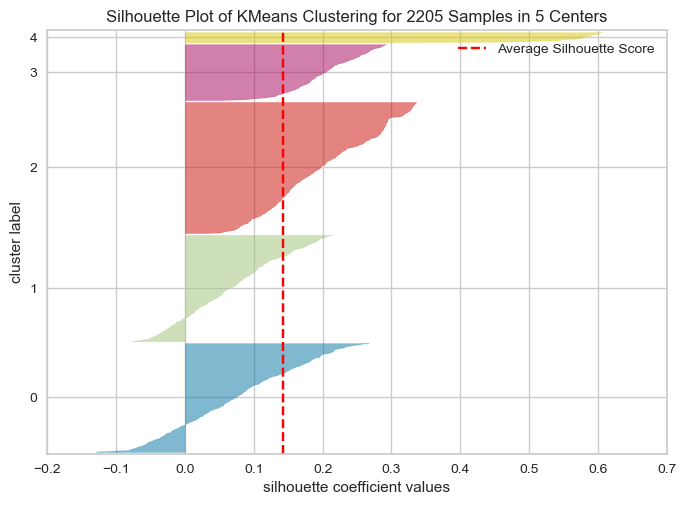

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


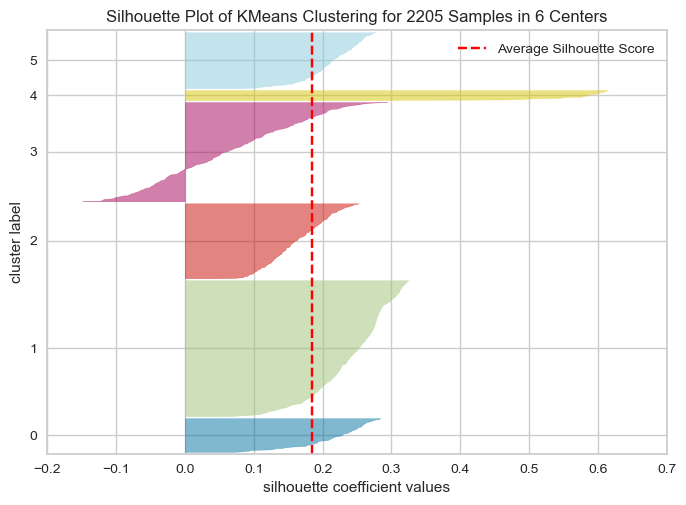

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


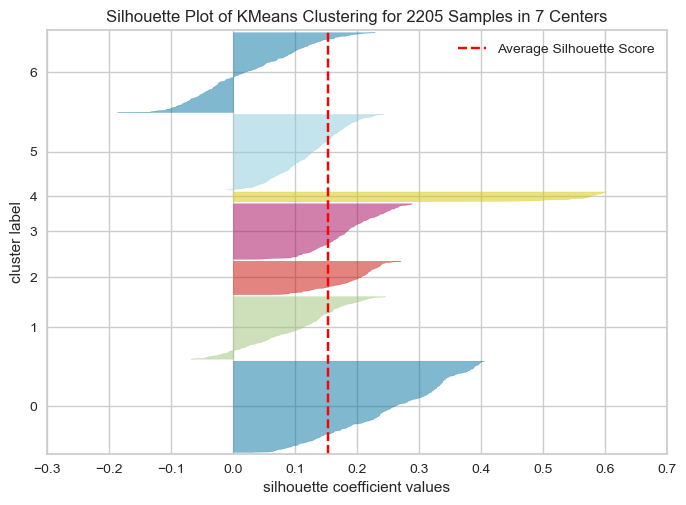

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


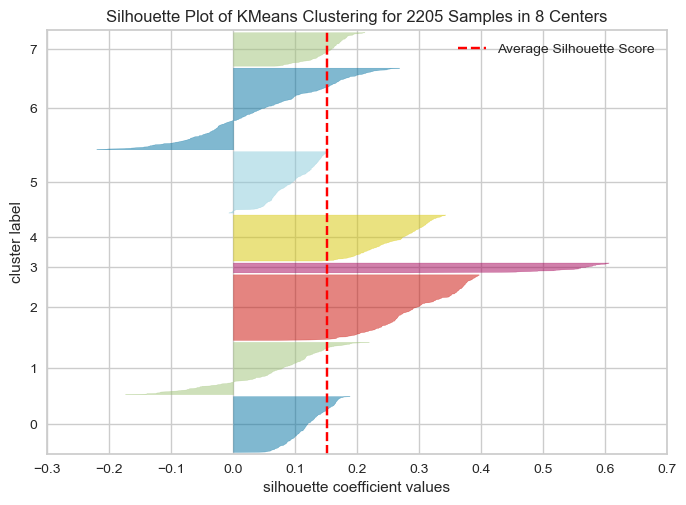

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


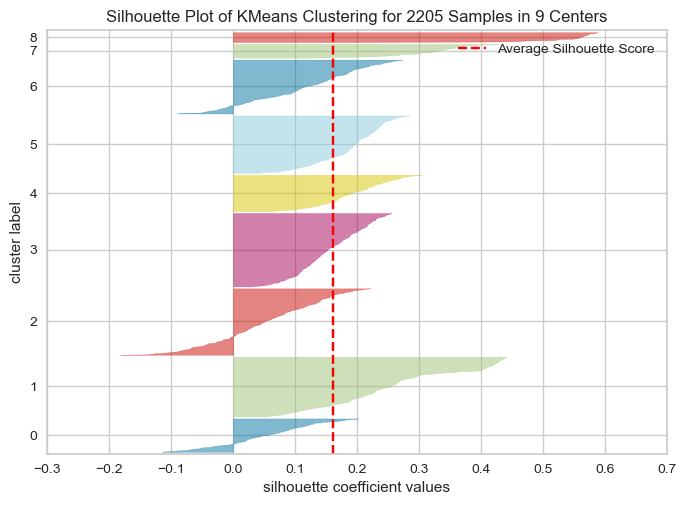

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


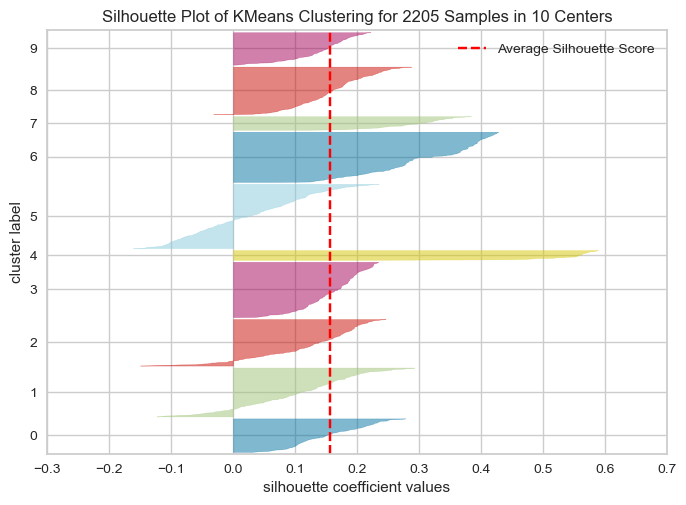

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


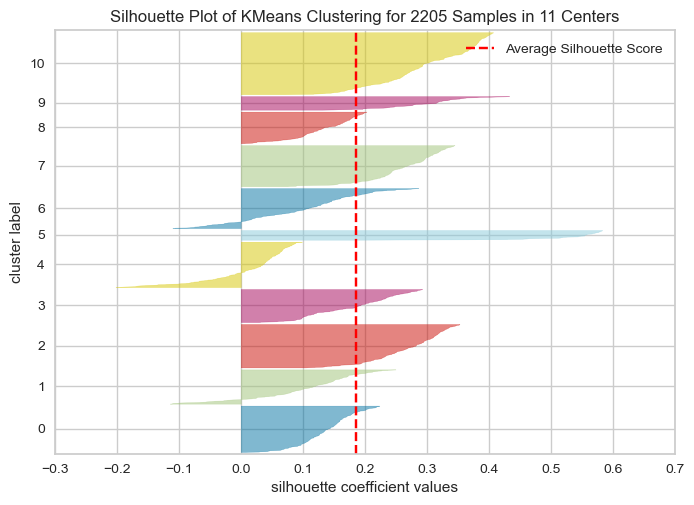

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


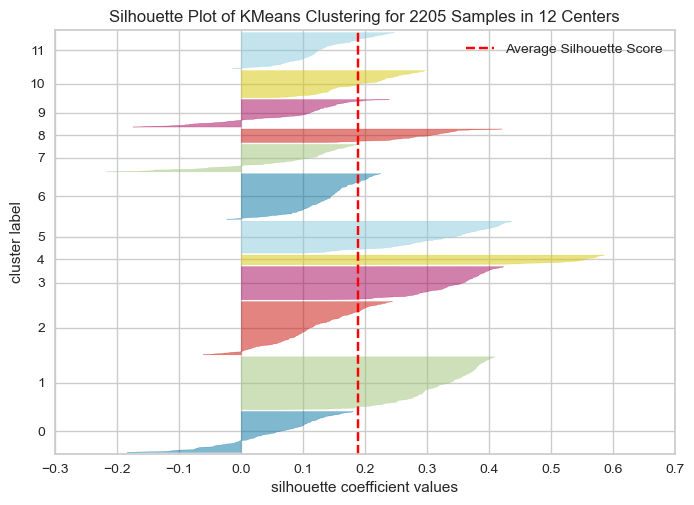

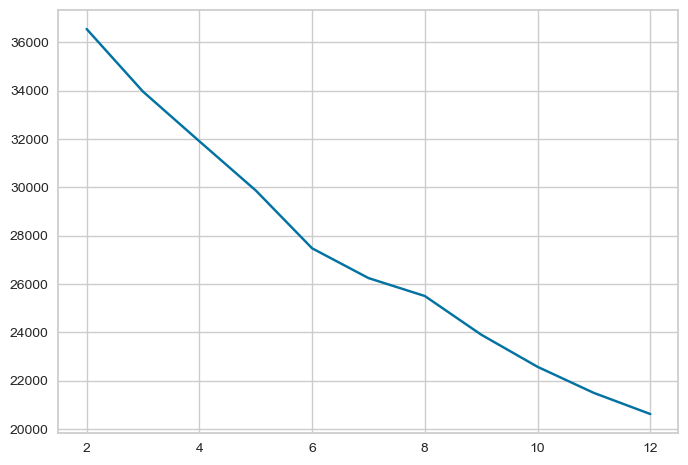

In [34]:
# sillhouette Score -1 έως 1

sillhouette_list= []
inertia_list= []
for i in range(2,13):
    model_kmeans = KMeans(n_clusters=i, random_state=0,  max_iter=100).fit(data_new_scaled)
    visualizer = SilhouetteVisualizer(model_kmeans, colors='yellowbrick')
    visualizer.fit(data_new_scaled)
    silhouette_avg = silhouette_score(data_new_scaled, model_kmeans.labels_)
    visualizer.poof()
    sillhouette_list.append(silhouette_avg)
    iner = model_kmeans.inertia_
    inertia_list.append(iner)


plt.plot([x for x in range(2, 13)], inertia_list)

In [52]:
prediction_k_means = KMeans(n_clusters=3, random_state=0,  max_iter=10).fit_predict(data_new_scaled)

C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nik\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [53]:
model_agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = model_agg.fit_predict(data_new_scaled)

In [54]:
data_new['K_cluster'] = prediction_k_means
data_new['Agg_cluster'] = clusters_agg

In [55]:
data_new

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spending,K_cluster,Agg_cluster,cluster_combined
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,57,1617,1,1,3_1
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,60,27,0,0,2_0
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,49,776,1,1,3_1
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,30,53,0,0,2_0
4,PhD,Married,58293.0,1,0,173,43,118,46,27,15,33,422,0,0,1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,47,1341,1,1,3_1
2236,PhD,Together,64014.0,2,1,406,0,30,0,0,8,68,444,2,0,1_0
2237,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,33,1241,1,2,3_2
2238,Master,Together,69245.0,0,1,428,30,214,80,30,61,58,843,2,0,0_0


In [56]:
data_new['cluster_combined'] = data_new['K_cluster'].astype(str) + '_' + data_new['Agg_cluster'].astype(str)

In [57]:
data_new['cluster_combined'].value_counts()

cluster_combined
0_0    742
2_0    556
1_1    448
2_2    140
1_2     84
1_0     83
0_2     80
2_1     62
0_1     10
Name: count, dtype: int64

In [58]:
data_new['K_cluster'].value_counts()

K_cluster
0    832
2    758
1    615
Name: count, dtype: int64

In [59]:
numerical_df = data_new.select_dtypes(exclude='object')
numerical_df.groupby('K_cluster').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spending,Agg_cluster
K_cluster,,,,,,,,,,,,
0,32246.592548,0.907452,0.299279,43.707933,6.165865,30.299279,8.295673,5.901442,17.794471,38.930288,112.164663,0.204327
1,74854.772358,0.056911,0.253659,595.286179,70.286179,437.222764,99.826016,73.269919,80.813008,45.200000,1356.704065,1.001626
2,55006.697889,0.242744,0.936675,357.415567,12.794195,98.370712,19.184697,12.886544,42.329815,51.794195,542.981530,0.451187


In [60]:
numerical_df.groupby('Agg_cluster').mean()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Total_Spending,K_cluster
Agg_cluster,,,,,,,,,,,,
0,42977.952209,0.592324,0.569153,182.141926,11.384504,69.481535,17.060101,12.152064,31.281680,44.229544,323.501810,0.865315
1,74768.213462,0.084615,0.275000,612.696154,64.534615,430.413462,91.165385,65.144231,73.986538,44.888462,1337.940385,1.100000
2,53710.210526,0.368421,0.611842,339.628289,28.861842,160.845395,39.049342,29.875000,49.072368,49.424342,647.332237,1.197368


In [61]:
data_new['Agg_cluster'].value_counts()

Agg_cluster
0    1381
1     520
2     304
Name: count, dtype: int64

In [62]:
data_group = numerical_df.groupby('Agg_cluster').median()

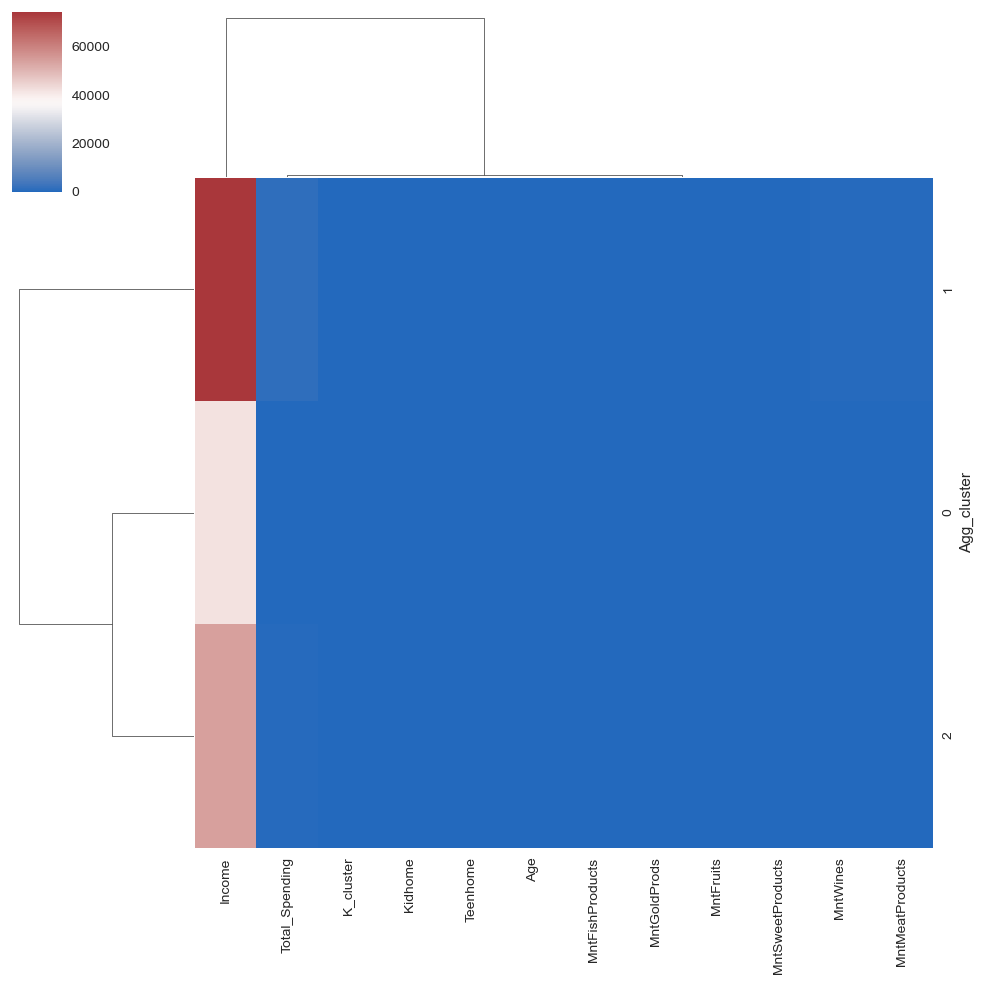

In [63]:
sns.clustermap(data_group, cmap="vlag")